<a href="https://colab.research.google.com/github/tomonari-masada/course2023-sml/blob/main/13_dimensionality_reduction_(random_projection_and_NMF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.random_projection import GaussianRandomProjection

%config InlineBackend.figure_format = 'retina'

In [3]:
train = pd.read_csv('/content/drive/MyDrive/data/sign_mnist_train.csv')
train.head()
test = pd.read_csv('/content/drive/MyDrive/data/sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
y_train = train.loc[:,'label'].values
X_train = train.loc[:,'pixel1':].values
y_test = test.loc[:,'label'].values
X_test = test.loc[:,'pixel1':].values

In [5]:
print(X_train.shape, X_test.shape)

(27455, 784) (7172, 784)


In [6]:
# global centering
train_mean = X_train.mean(axis=0) # 訓練データ全体でのピクセルごとの平均値
X_train_centered = X_train - train_mean
X_test_centered = X_test - train_mean

In [7]:
# local centering
X_train_centered -= X_train_centered.mean(axis=1).reshape(-1, 1)
X_test_centered -= X_test_centered.mean(axis=1).reshape(-1, 1) # インスタンスごとの計算なので許される。

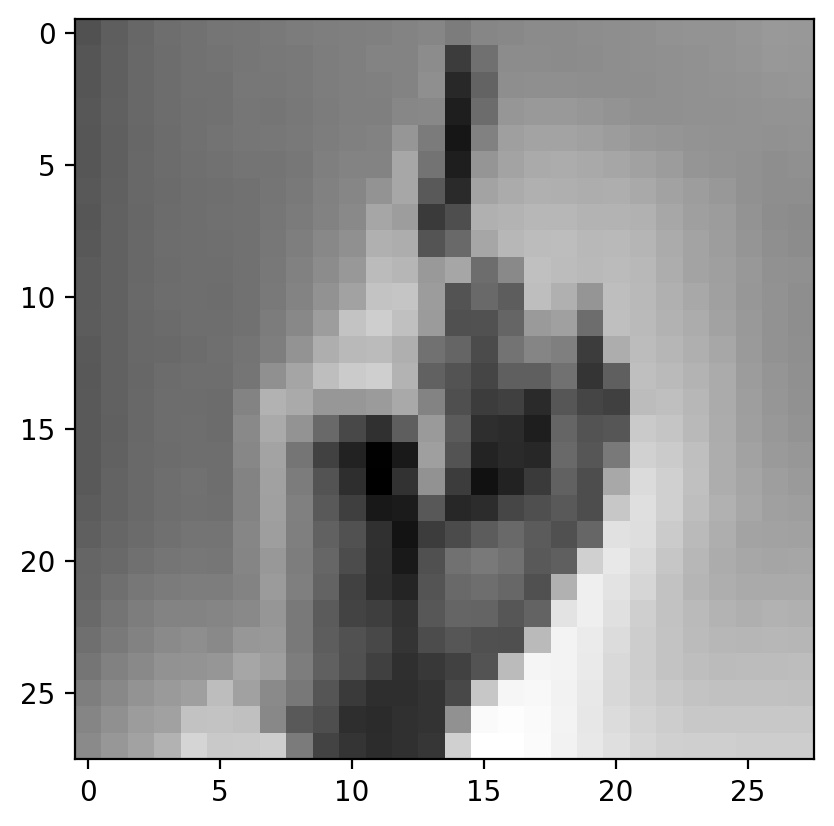

In [8]:
plt.imshow(X_train_centered[0,:].reshape(28,28), cmap=plt.cm.gray);

In [9]:
def plot_gallery(title, images, n_col=3, n_row=3, cmap=plt.cm.gray):
  plt.figure(figsize=(2. * n_col, 2.26 * n_row))
  plt.suptitle(title, size=16)
  for i, comp in enumerate(images):
    plt.subplot(n_row, n_col, i + 1)
    vmax = max(comp.max(), -comp.min())
    plt.imshow(
        comp.reshape(28, 28),
        cmap=cmap,
        interpolation="nearest",
        vmin=-vmax,
        vmax=vmax,
        )
    plt.xticks([])
    plt.yticks([])
  plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.);

* 再構成のチェック用に使う画像8枚のインデックスをランダムに決定する。

In [10]:
n_recon_images = 8
indices = np.random.randint(X_test.shape[0], size=n_recon_images)

## Random projectionを試してみる
* 再構成にはあまり向いていなさそう。
 * 元のベクトルどうしの距離の大小を損なわないように次元を落とすのが、主な用途なので。

In [11]:
n_components = 300
estimator = GaussianRandomProjection(
    n_components=n_components,
    compute_inverse_components=True,
    random_state=123
    )
estimator.fit(X_train_centered)

GaussianRandomProjection(compute_inverse_components=True, n_components=300,
                         random_state=123)

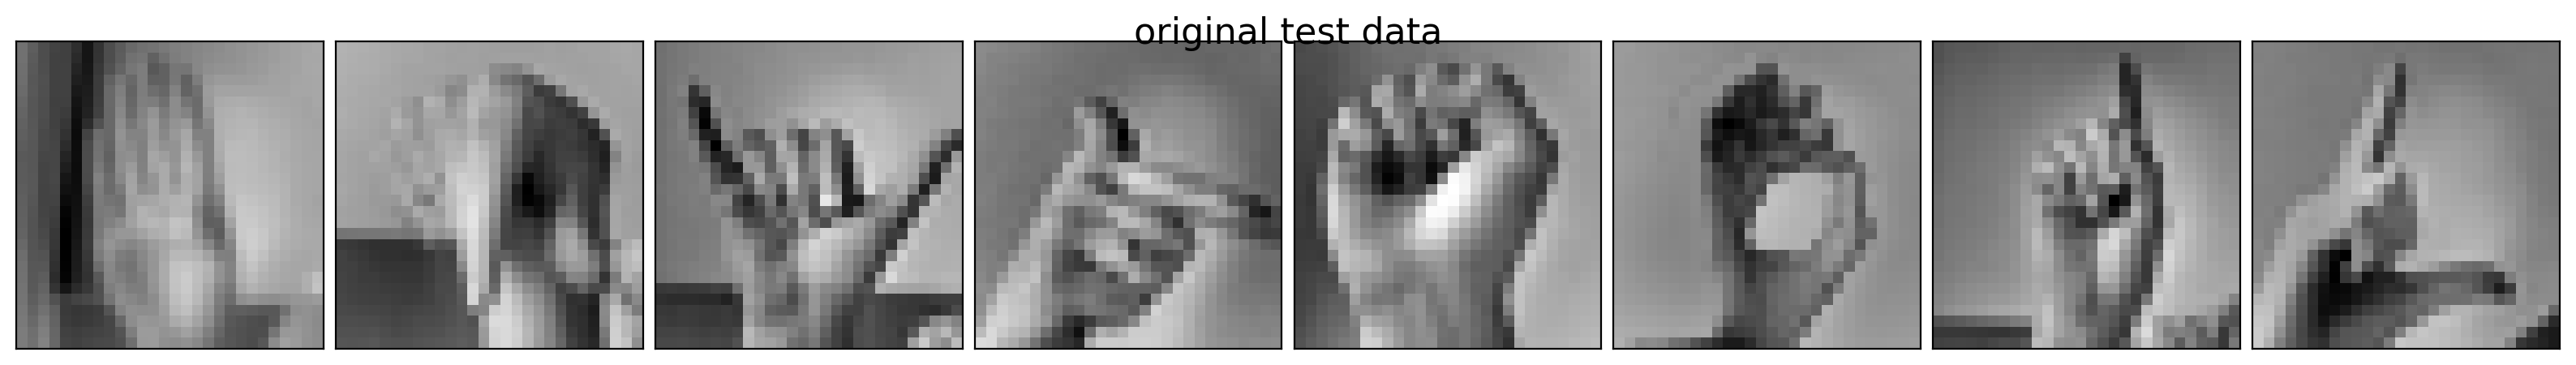

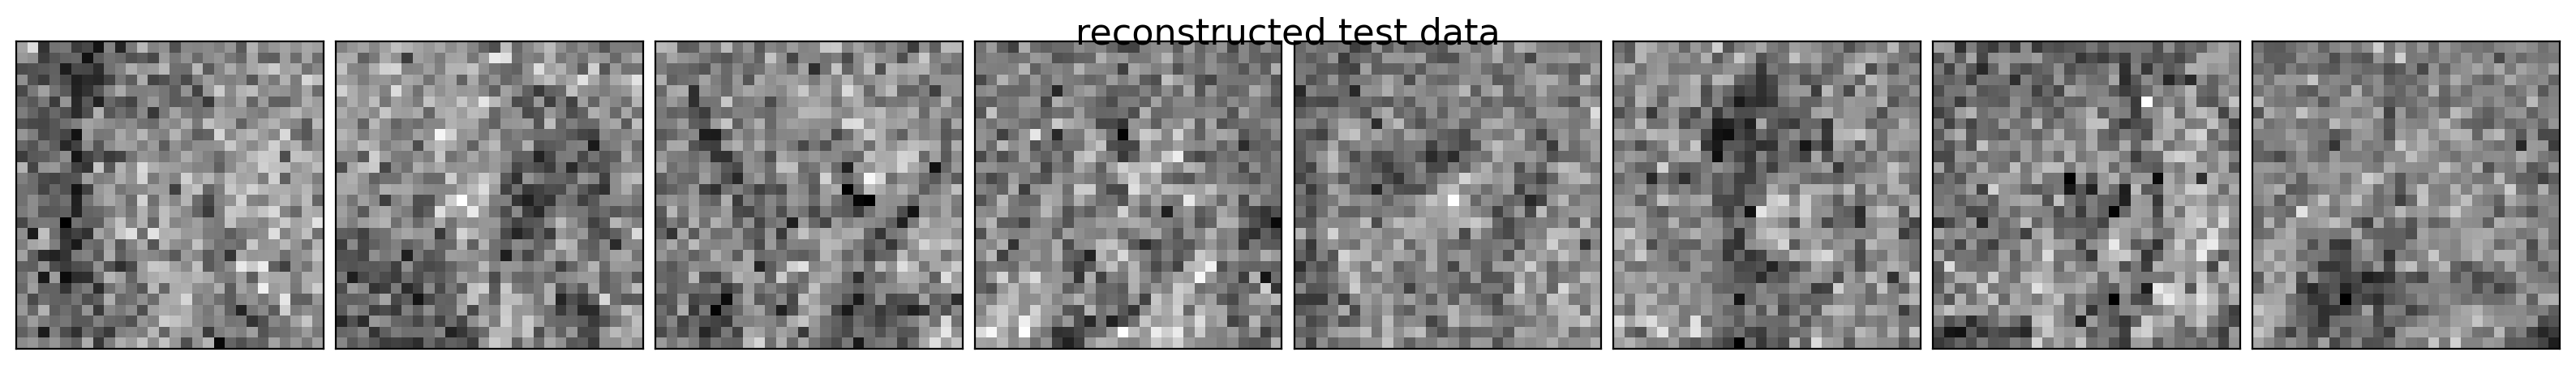

In [12]:
plot_gallery("original test data", X_test_centered[indices], n_row=1, n_col=n_recon_images)
X_test_recon = estimator.inverse_transform(estimator.transform(X_test_centered))
plot_gallery(f"reconstructed test data", X_test_recon[indices], n_row=1, n_col=n_recon_images)

## NMF
* PCAより高度な計算をしているので、時間がかかるのは我慢する。
* centeringしたデータは負の値を含むので、元のデータを使う。
 * centeringしたデータにabsを適用すると、非負にはなるが、元の画像と全然違う画像になるので、注意。


* `tol`を調整する。
 * `tol`の値が大きすぎると、計算が早く終わってしまい、雑なコンポーネントが得られてしまう。
* `verbose=1`として、ある程度は収束しているかをチェックする。
 * violationの意味は、githubを参照。
 * https://github.com/scikit-learn/scikit-learn/blob/7f9bad99d/sklearn/decomposition/_nmf.py#L1309

In [13]:
n_components = 50
estimator = NMF(
    n_components=n_components,
    tol=5e-6,
    max_iter=1000,
    verbose=1, # この設定で、収束の様子を見る。
    random_state=123
    )
estimator.fit(X_train)

violation: 1.0
violation: 9.10354838103207e-06
violation: 1.8542672557363598e-05
violation: 3.079364413557223e-05
violation: 3.4402695805657815e-05
violation: 3.4392630056826304e-05
violation: 3.2813581807678016e-05
violation: 3.210298240466806e-05
violation: 3.175850147275626e-05
violation: 3.143300676499399e-05
violation: 3.139092714889492e-05
violation: 3.13983537787332e-05
violation: 3.1212700282782126e-05
violation: 3.063357558755815e-05
violation: 2.9764341463015566e-05
violation: 2.880694546381645e-05
violation: 2.795956421840458e-05
violation: 2.7254721377519324e-05
violation: 2.659562081877889e-05
violation: 2.5992636503481155e-05
violation: 2.538454821336739e-05
violation: 2.4820606990554864e-05
violation: 2.431744204862553e-05
violation: 2.3825365921979054e-05
violation: 2.335498109149195e-05
violation: 2.2905638251030513e-05
violation: 2.2508302568926255e-05
violation: 2.213090520124258e-05
violation: 2.1735271460573178e-05
violation: 2.136709023501133e-05
violation: 2.0989

NMF(max_iter=1000, n_components=50, random_state=123, tol=5e-06, verbose=1)

* ある程度たくさん計算させれば、NMFでコンポーネント数50でも、それなりの再構成になる。

violation: 1.0
violation: 0.679116571890836
violation: 0.44564332741797635
violation: 0.3170102987130692
violation: 0.24152734102614312
violation: 0.1918025284646502
violation: 0.15401165977866235
violation: 0.1210781245333781
violation: 0.0930762578318965
violation: 0.07132952658221725
violation: 0.054739454373940455
violation: 0.04248692435454965
violation: 0.033905655578452286
violation: 0.02830307086869444
violation: 0.024473042222072732
violation: 0.021635358172075524
violation: 0.01940640769511975
violation: 0.017517283060339443
violation: 0.015907905956405496
violation: 0.014528710086524947
violation: 0.013356328626116888
violation: 0.012351482164668666
violation: 0.011500301204050276
violation: 0.010803564515291774
violation: 0.010229705960354685
violation: 0.009741211101299706
violation: 0.009308047977985416
violation: 0.008909336136249479
violation: 0.008530154155657003
violation: 0.008160845283283402
violation: 0.007798956755779913
violation: 0.007445381448417844
violation: 

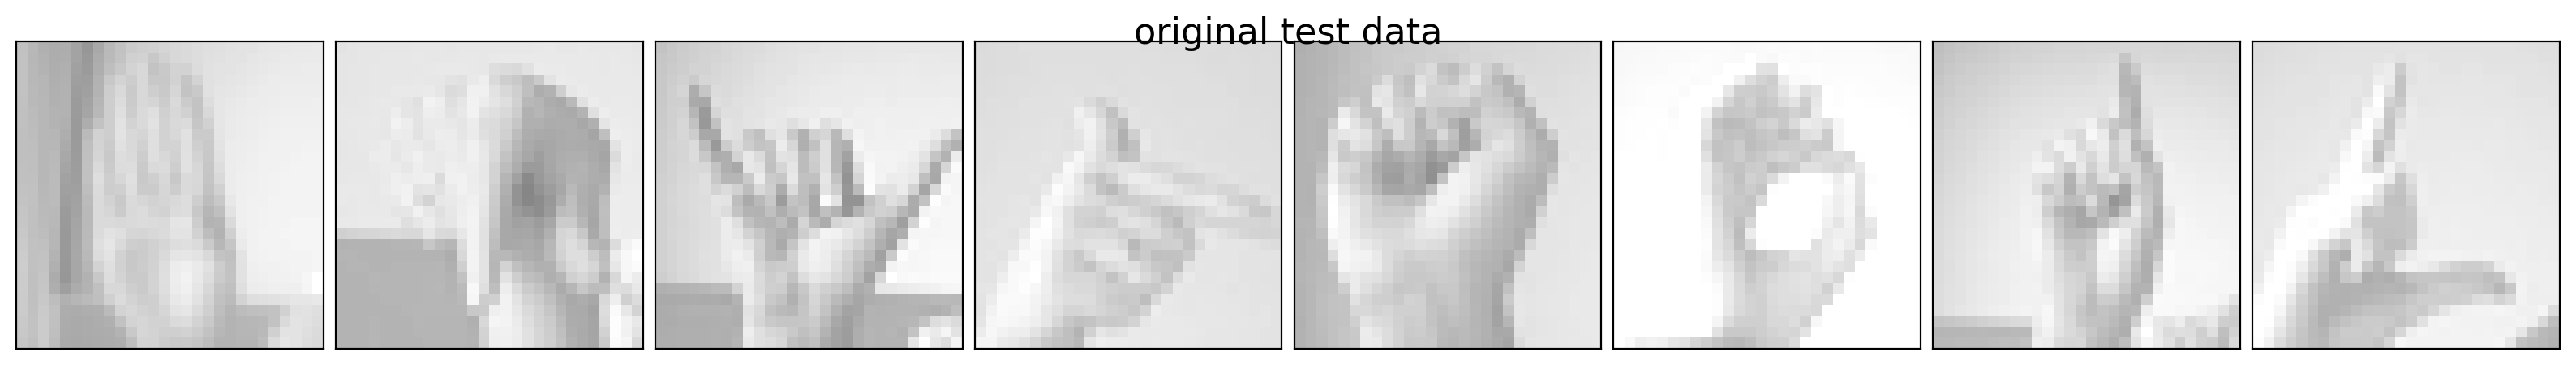

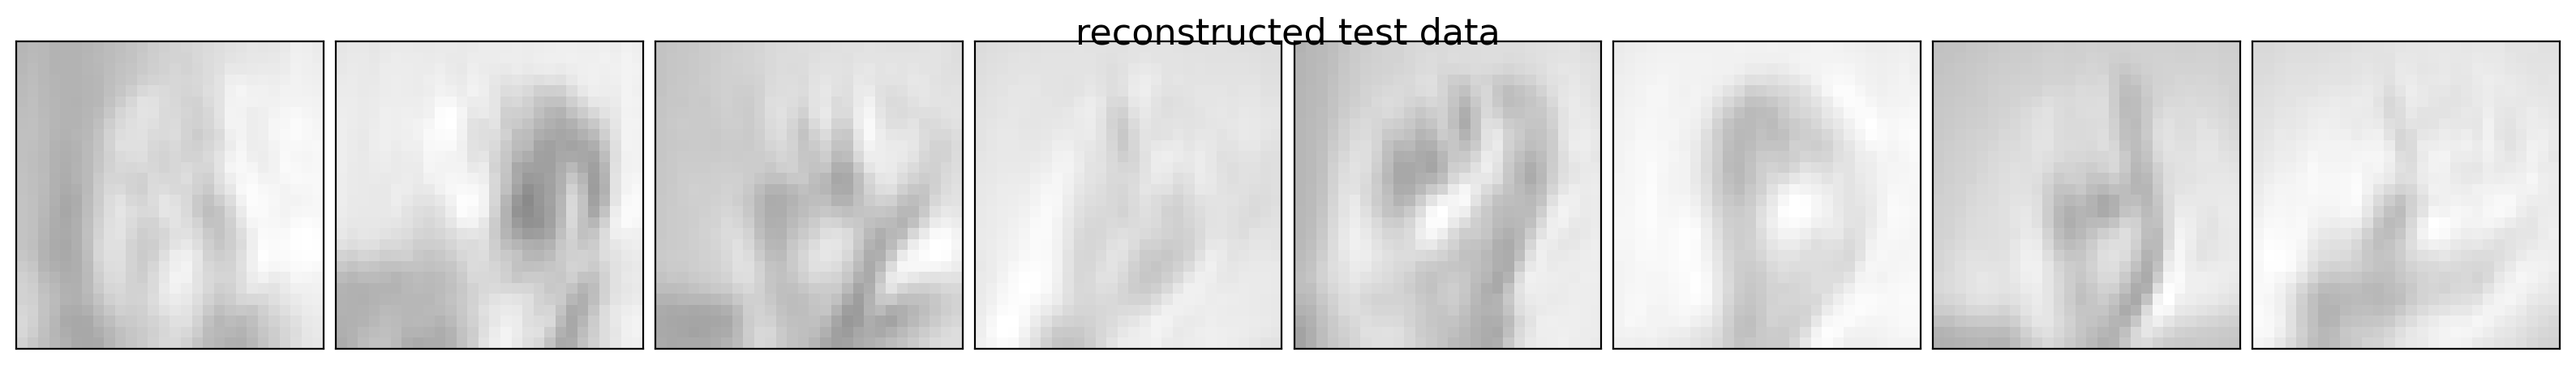

In [14]:
plot_gallery("original test data", X_test[indices], n_row=1, n_col=n_recon_images)
X_test_recon = estimator.inverse_transform(estimator.transform(X_test))
plot_gallery(f"reconstructed test data", X_test_recon[indices], n_row=1, n_col=n_recon_images)